In [1]:
#important information AC, HP (avg), stats, saves, save prof, dmg resistances, dmg immunities, dmg vulnerabilities, fly, hover, sizes

#graphs:
#boxplot 1: AC
#boxplot 2: HP (avg)
#boxplot 3: save mods
#bar graph 1: dmg resistances, dmg immunities, dmg vulnerabilities
#bar graph 2: sizes
#bar graph 3: fly, hover

In [1]:
#sorting
import json

crList = {"null":[],"0":[],"1/8":[],"1/4":[], "1/2":[], "1":[], "2":[],"3":[],"4":[],"5":[],"6":[],"7":[],"8":[],"9":[],"10":[],
          "11":[],"12":[],"13":[],"14":[],"15":[],"16":[],"17":[],"18":[],"19":[],"20":[],"21":[],"22":[],"23":[],"24":[],
          "25":[],"26":[],"27":[],"28":[],"29":[],"30":[]}

with open('Data/index.json') as json_file:
    index = json.load(json_file)

for key in index:
    file = "Data/"+index[key]
    with open(file) as json_file1:
        list = json.load(json_file1)
    for key1 in list["monster"]:
        if "cr" in key1:
            if "cr" in key1["cr"]:
                crList[key1["cr"]["cr"]].append(key1)
            else:
                crList[key1["cr"]].append(key1)
        else:
            crList["null"].append(key1)

In [31]:
import json
import math

stats = ["str", "dex", "con", "int", "wis", "cha"]
dataList={}

for cr in crList:
    data = {"total":len(crList[cr]),"AC":[], "HP":[], 
                 #stats
                 "str":[],"dex":[],"con":[],"int":[],"wis":[],"cha":[],
                 #damage types
                 "resistances":{"acid":0, "bludgeoning":0, "cold":0,"fire":0,"force":0,"lightning":0,"necrotic":0,
                                "piercing":0,"poison":0,"psychic":0,"radiant":0,"slashing":0,"thunder":0},
                 "immunities":{"acid":0, "bludgeoning":0, "cold":0,"fire":0,"force":0,"lightning":0,"necrotic":0,
                               "piercing":0,"poison":0,"psychic":0,"radiant":0,"slashing":0,"thunder":0},
                 "vulnerabilities":{"acid":0, "bludgeoning":0, "cold":0,"fire":0,"force":0,"lightning":0,"necrotic":0,
                                    "piercing":0,"poison":0,"psychic":0,"radiant":0,"slashing":0,"thunder":0},
                 #coniditon types
                 "condImmunities":{"blinded":0,"charmed":0,"deafened":0, "disease":0, "exhaustion":0, "frightened":0,
                                 "grappled":0, "incapacitated":0, "invisible":0, "paralyzed":0, "petrified":0, "poisoned":0,
                                 "prone":0, "restrain":0, "stunned":0, "unconscious":0},
                 #sizes
                 "T":0, "S":0, "M":0, "L":0, "H":0, "G":0,
                 "fly":0, "hover":0
                }
    for monster in crList[cr]:
        #AC
        if "ac" in monster:
            if type(monster["ac"][0]) == int:
                data["AC"].append(monster["ac"][0])
            elif "ac" in monster["ac"][0]:
                data["AC"].append(monster["ac"][0]["ac"])
        else:
            data["AC"].append("-")
        #HP (avg)
        if "hp" in monster:
            if "special" in monster["hp"]:
                data["HP"].append("-")
            else:
                data["HP"].append(monster["hp"]["average"])
        else:
            data["HP"].append("-")
        #save mods
        for stat in stats:
            if "save" in monster:
                if stat in monster["save"]:
                    if "PB" not in monster["save"][stat]:
                        data[stat].append(int(monster["save"][stat].replace("+", "")))
                else:
                    data[stat].append(math.floor((monster[stat]-10)/2))
            elif stat in monster:
                data[stat].append(math.floor((monster[stat]-10)/2))
            else:
                data[stat].append("-")
        #dmg resistances, dmg immunities, dmg vulnerabilities
        if "immune" in monster:
            for dmg in monster["immune"]:
                if type(dmg) == str:
                    data["immunities"][dmg]+=1
                else:
                    if "immune" in dmg:
                        for dmg2 in dmg["immune"]:
                            data["immunities"][dmg2]+=1
        if "resist" in monster:
            for dmg in monster["resist"]:
                if type(dmg) == str:
                    data["resistances"][dmg]+=1
                else:
                    if "resist" in dmg:
                        for dmg2 in dmg["resist"]:
                            data["resistances"][dmg2]+=1
        #vuln
        if "vulnerable" in monster:
            for dmg in monster["vulnerable"]:
                if type(dmg) == str:
                    data["vulnerabilities"][dmg]+=1
                else:
                    if "vulnerable" in dmg:
                        for dmg2 in dmg["vulnerable"]:
                            data["vulnerabilities"][dmg2]+=1
        #sizes
        if "size" in monster:
            data[monster["size"][0]]+=1
        #fly, hover
        if "speed" in monster:
            if "fly" in monster["speed"]:
                data["fly"]+=1
            if "canHover" in monster["speed"]:
                data["hover"]+=1
        else: #only dracolich doesnt bc it copies red dragon (has hover and fly, this works but only for the dataset)
            data["fly"]+=1
            data["hover"]+=1
    dataList.update({cr:data})

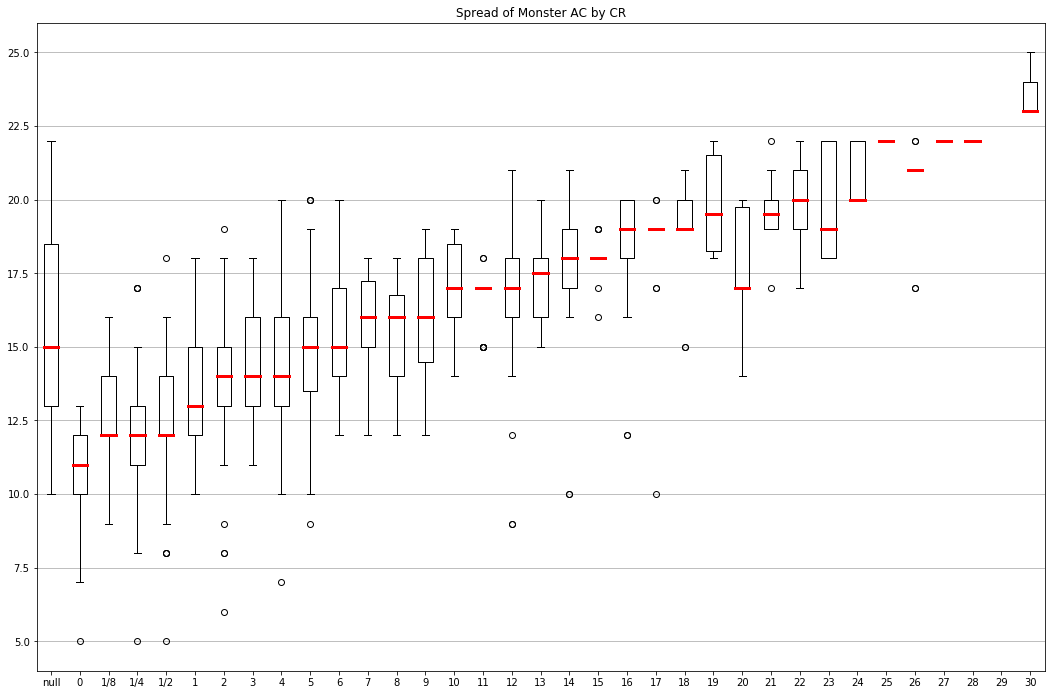

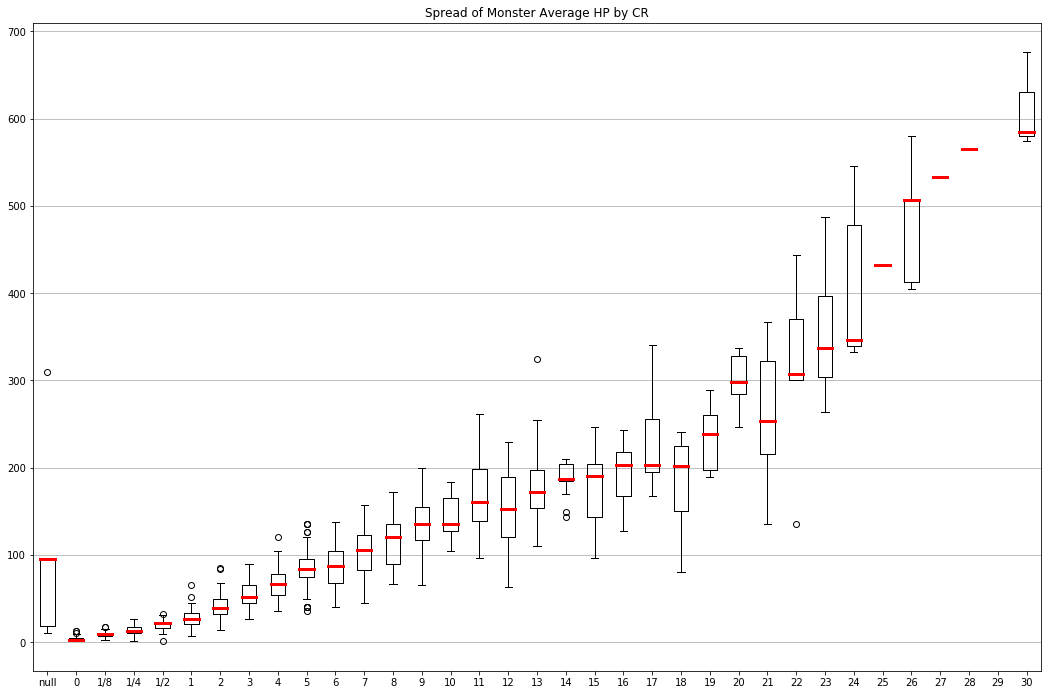

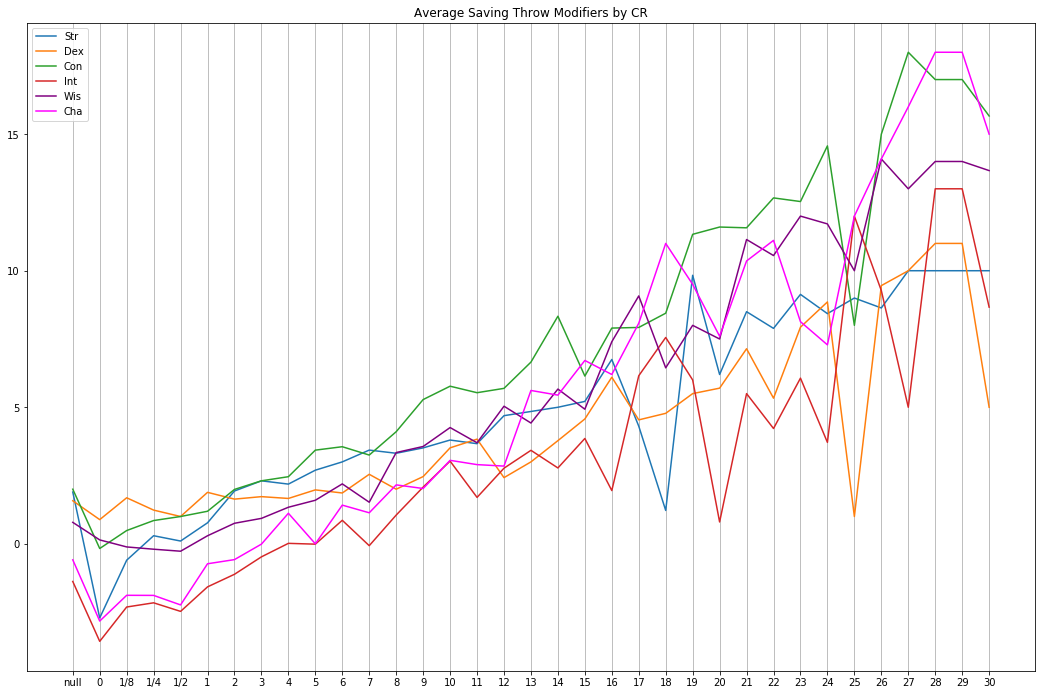

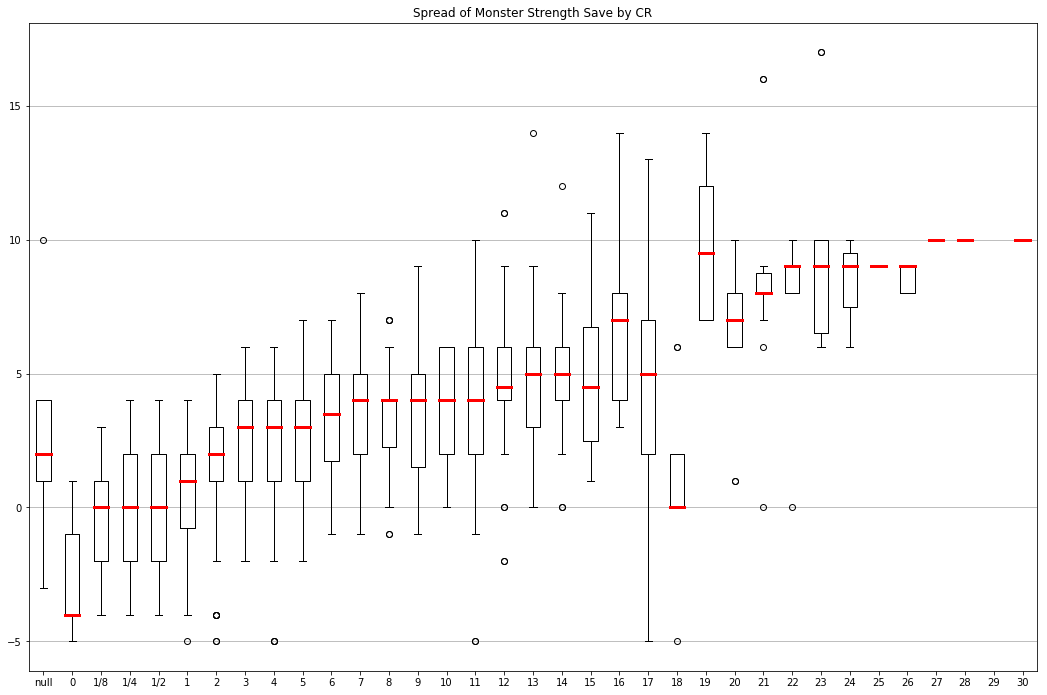

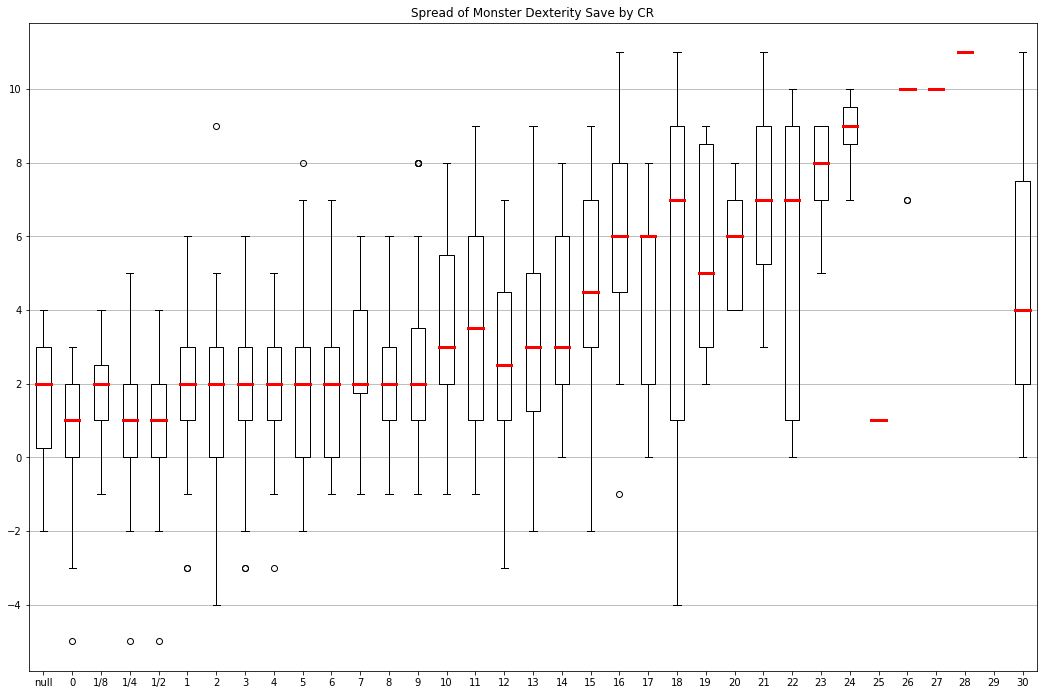

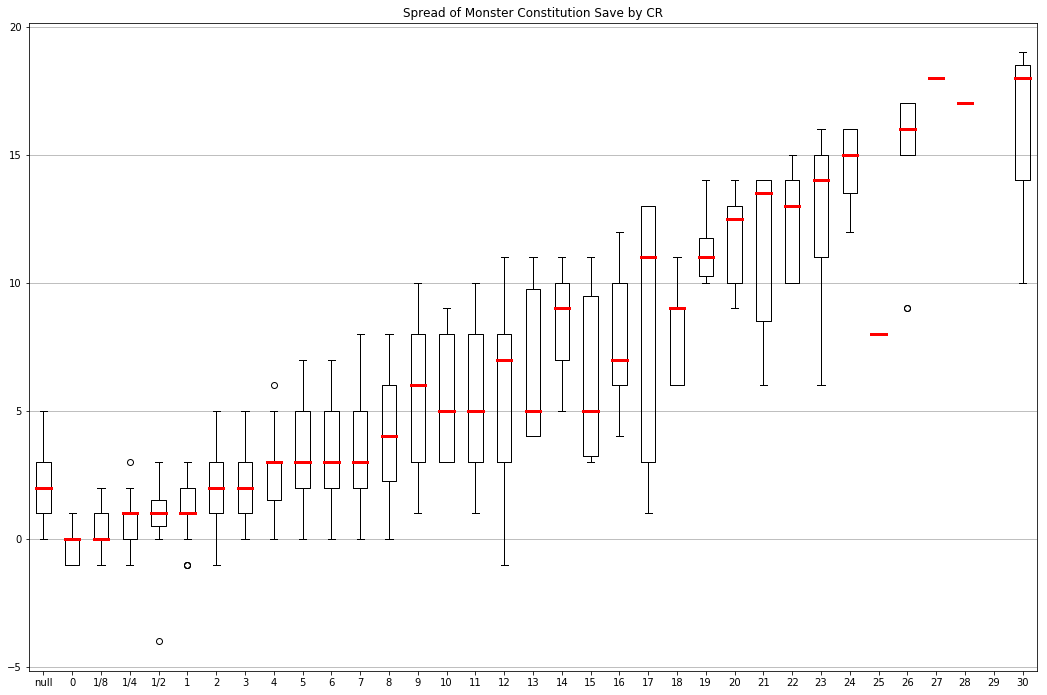

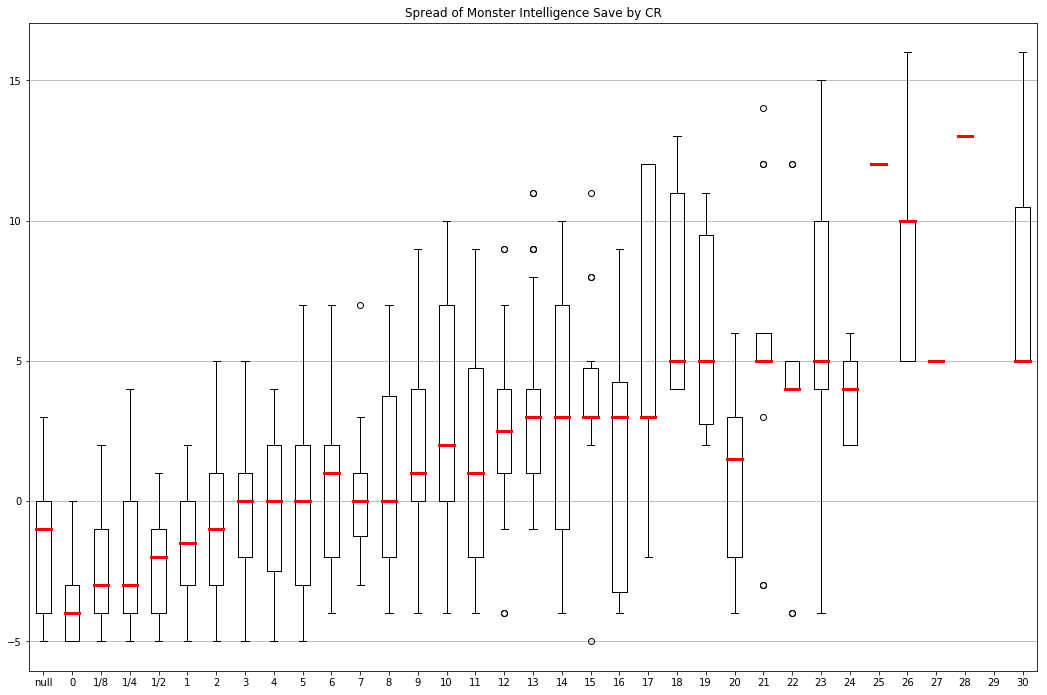

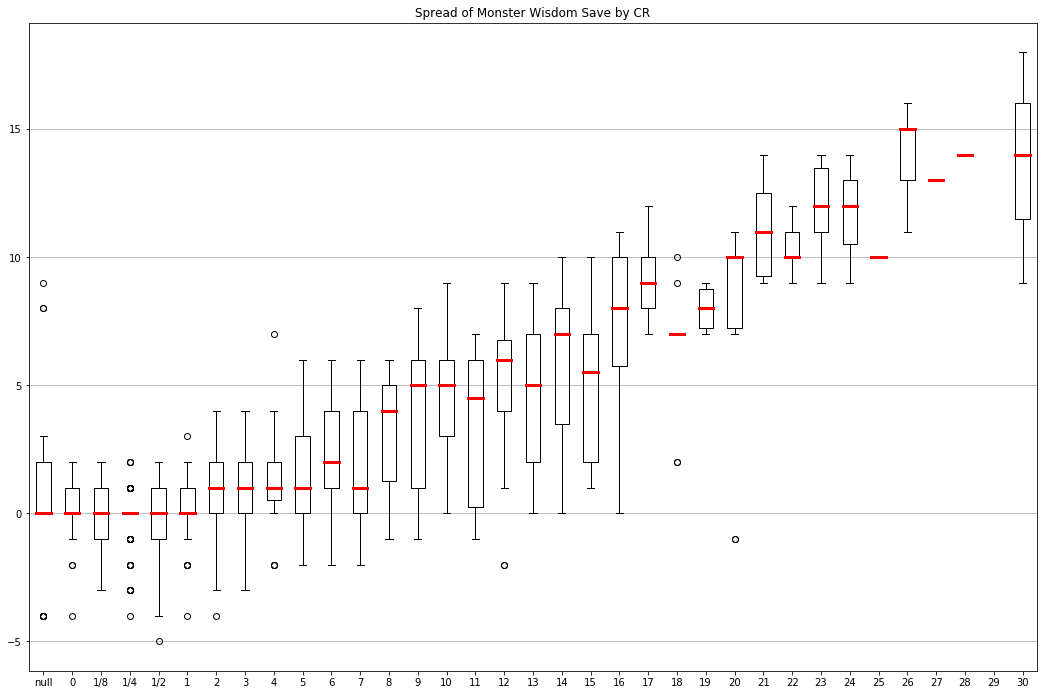

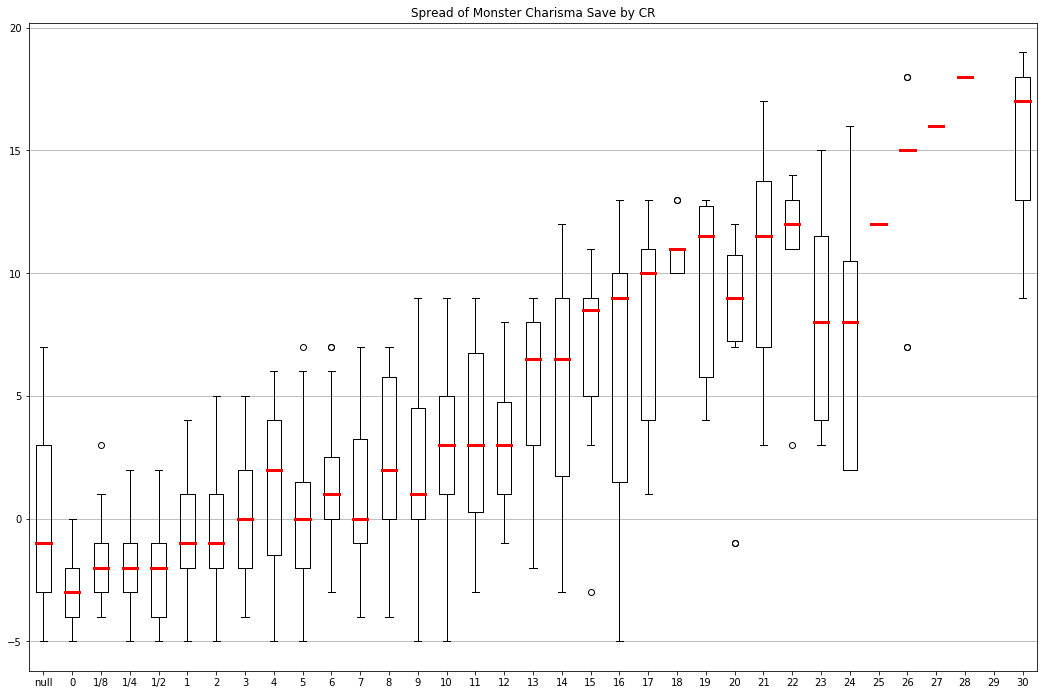

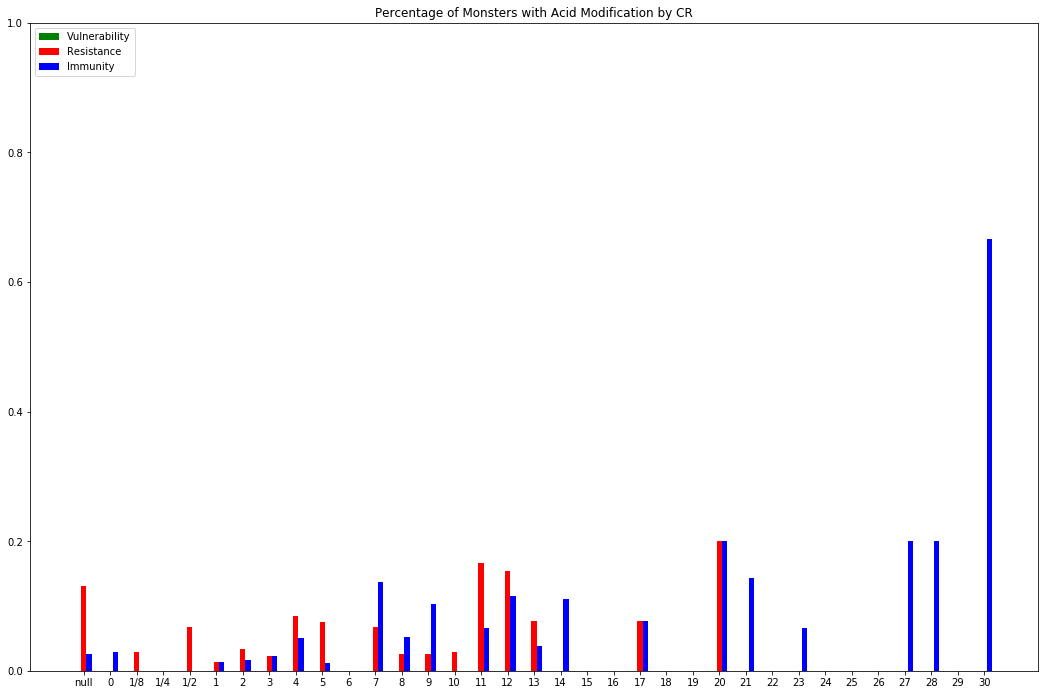

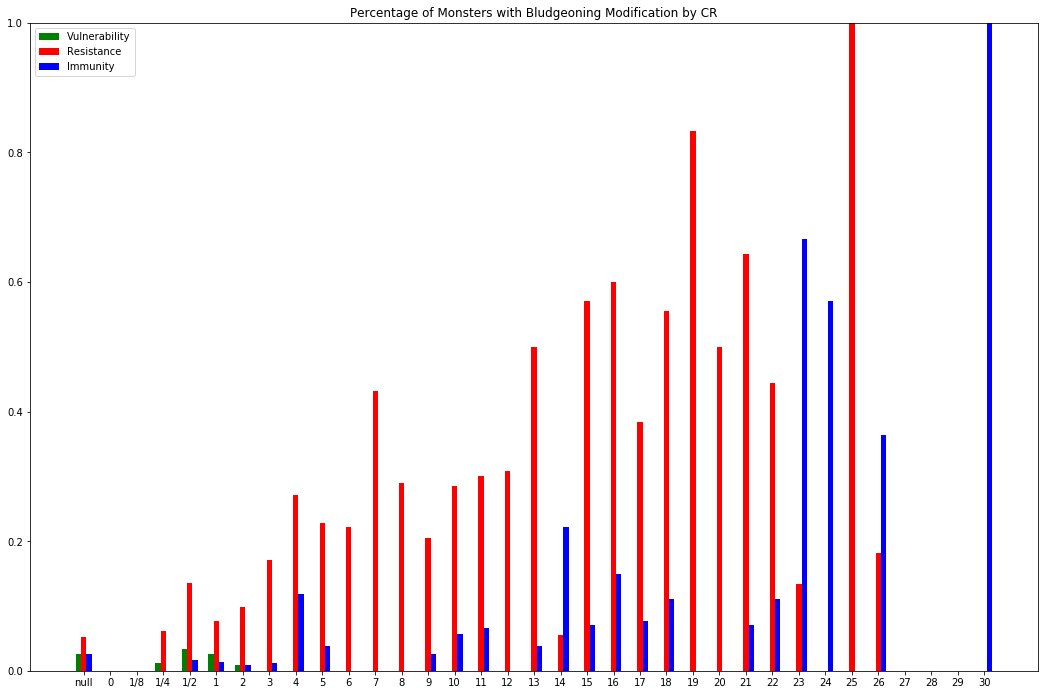

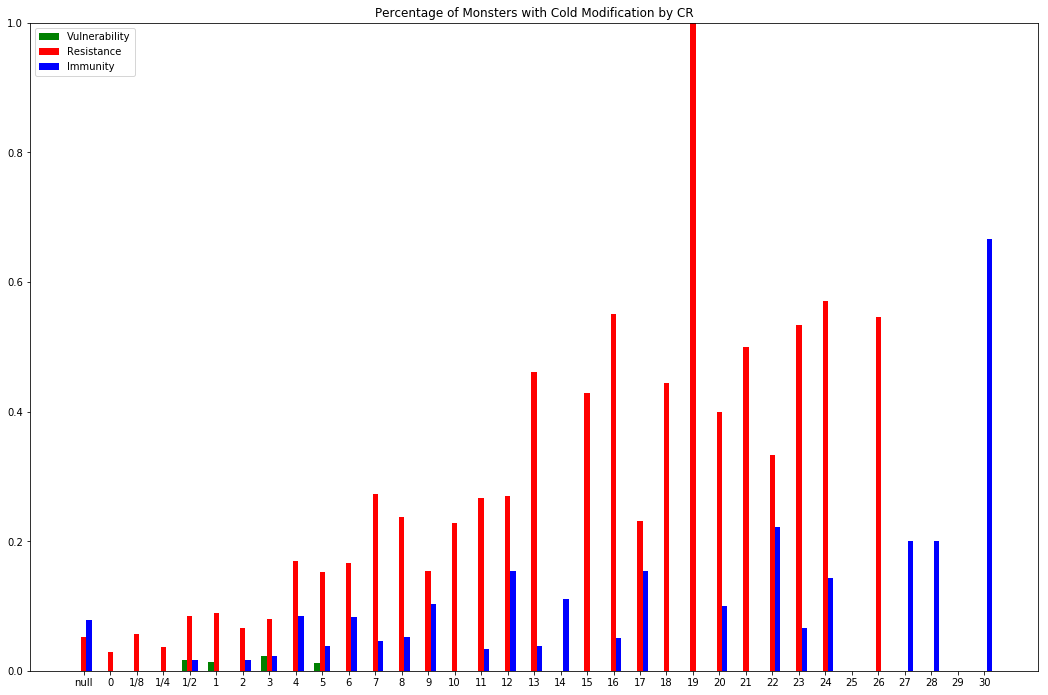

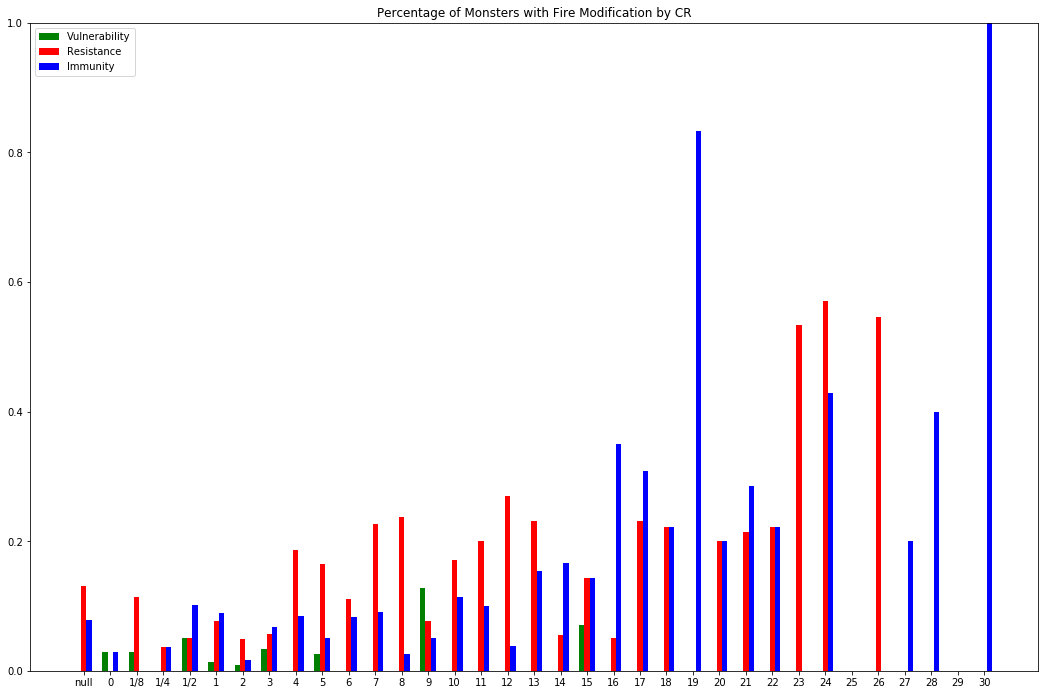

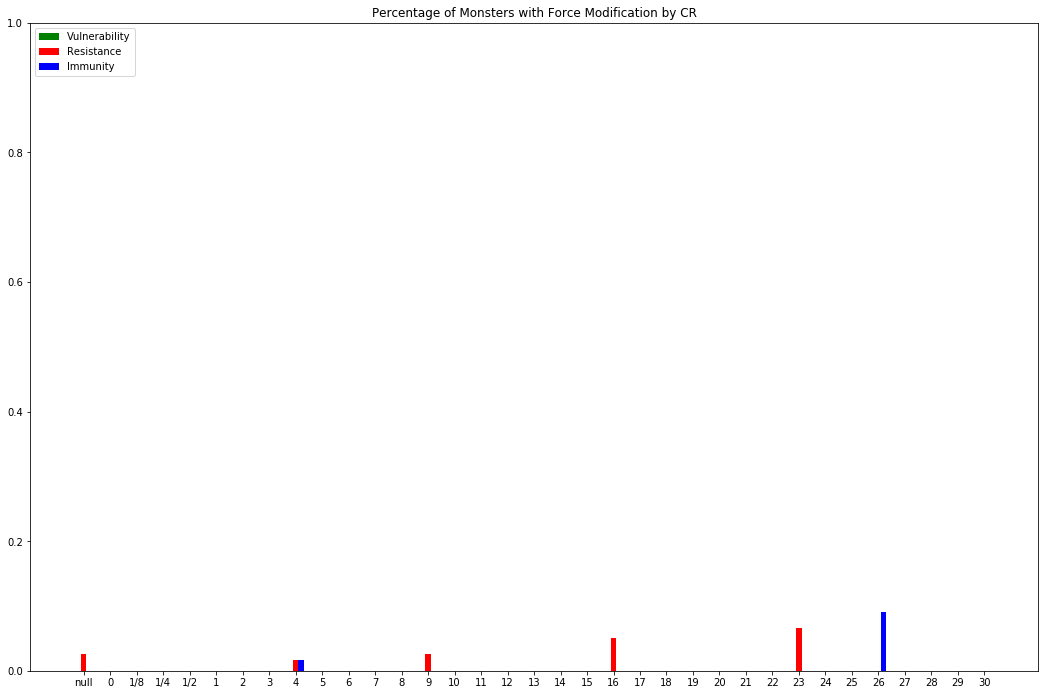

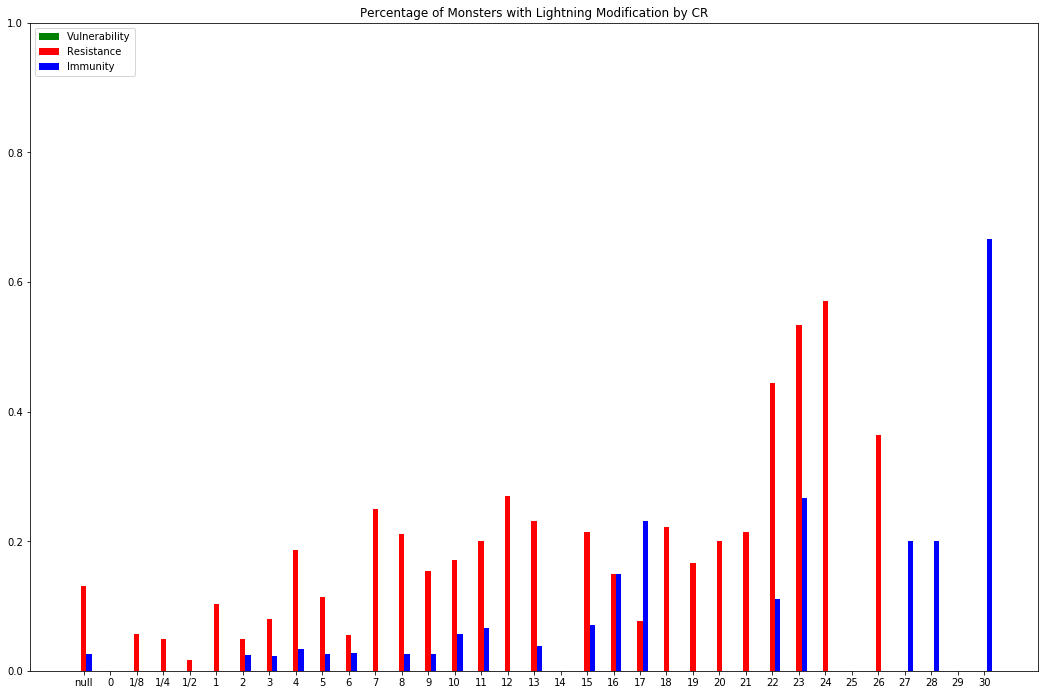

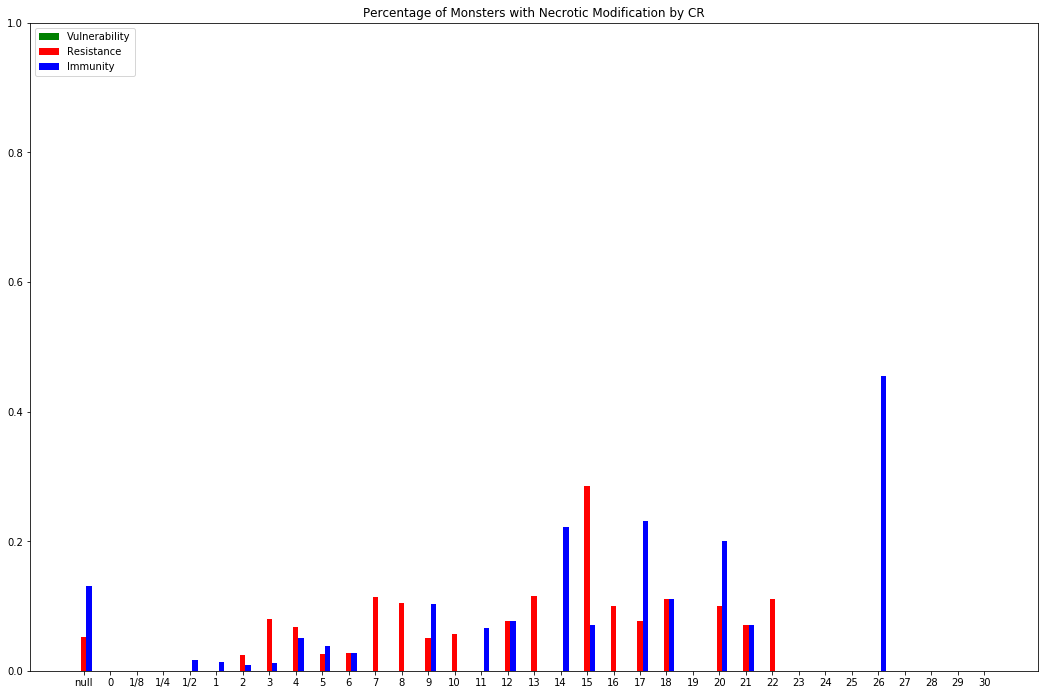

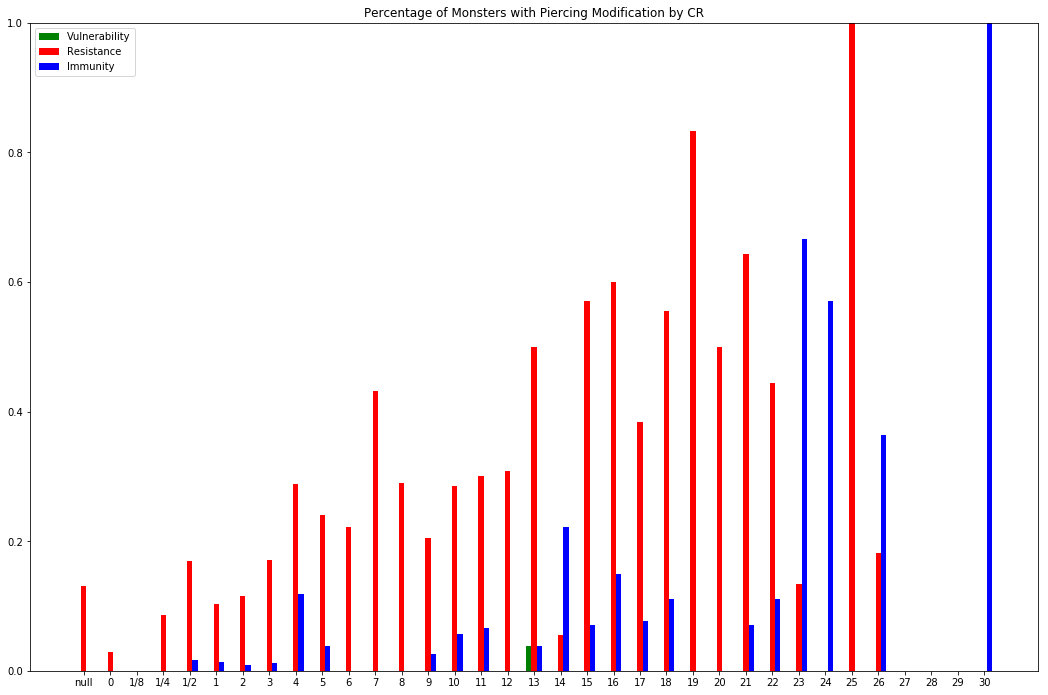

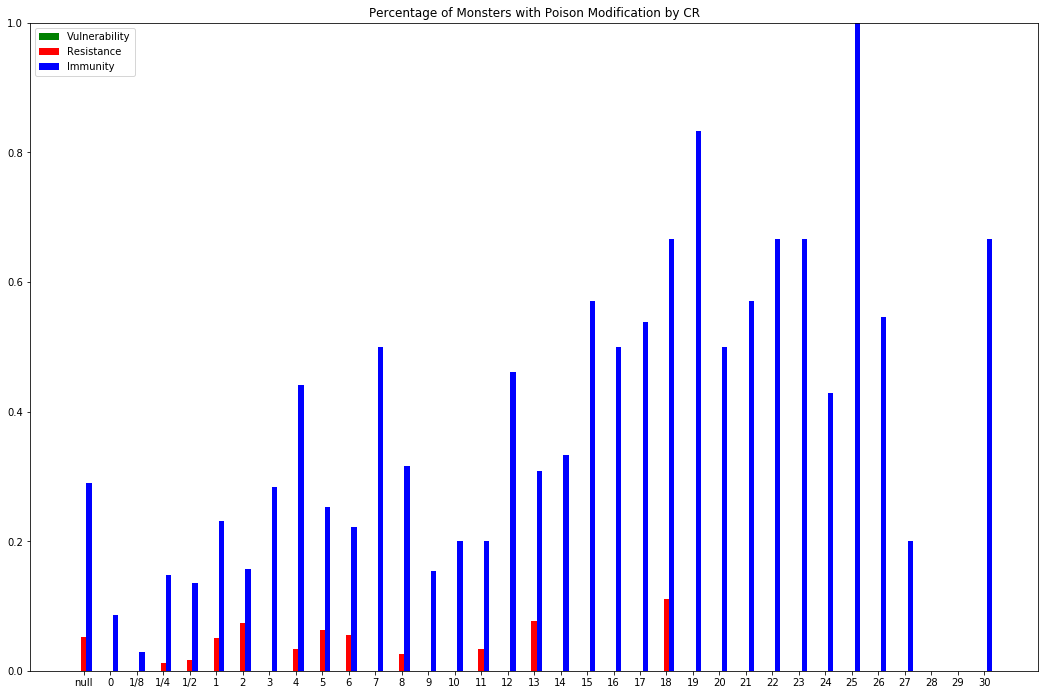

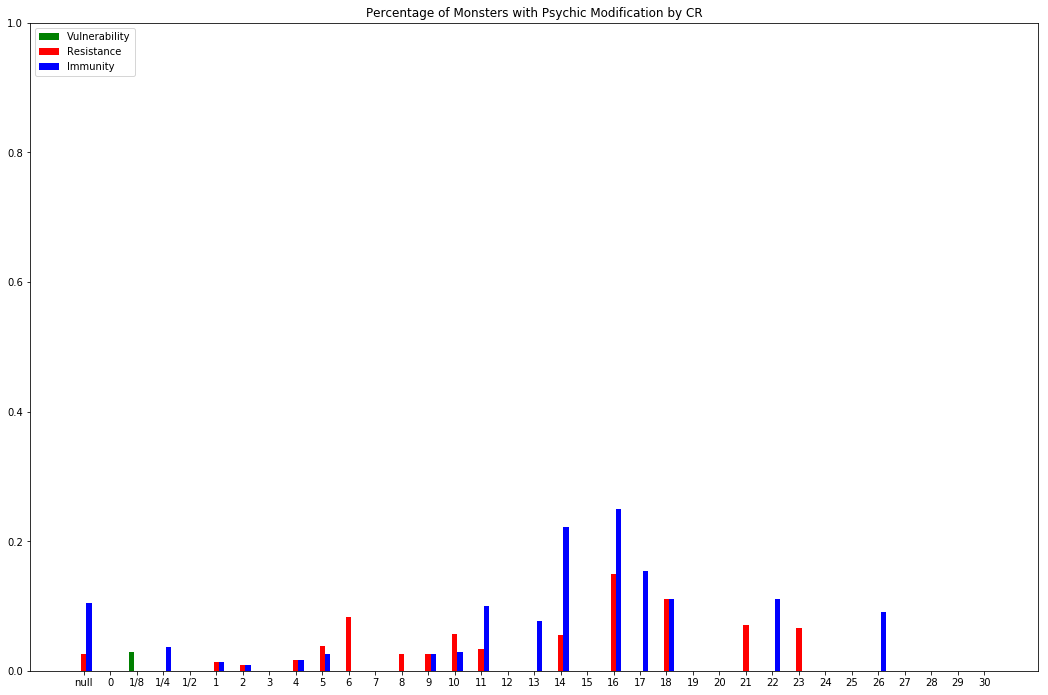

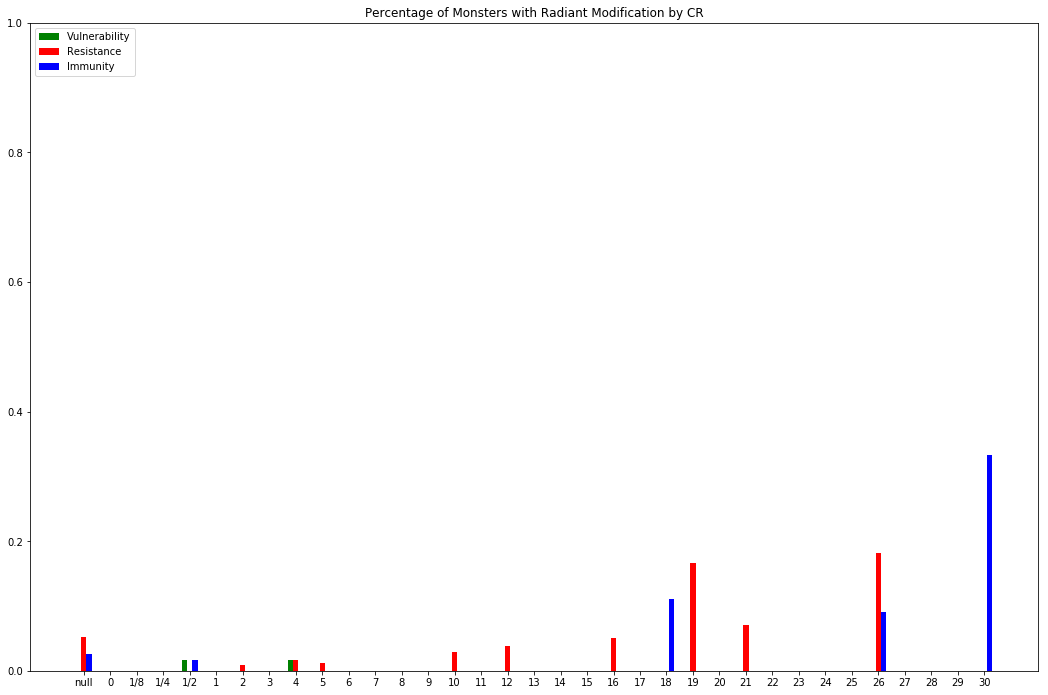

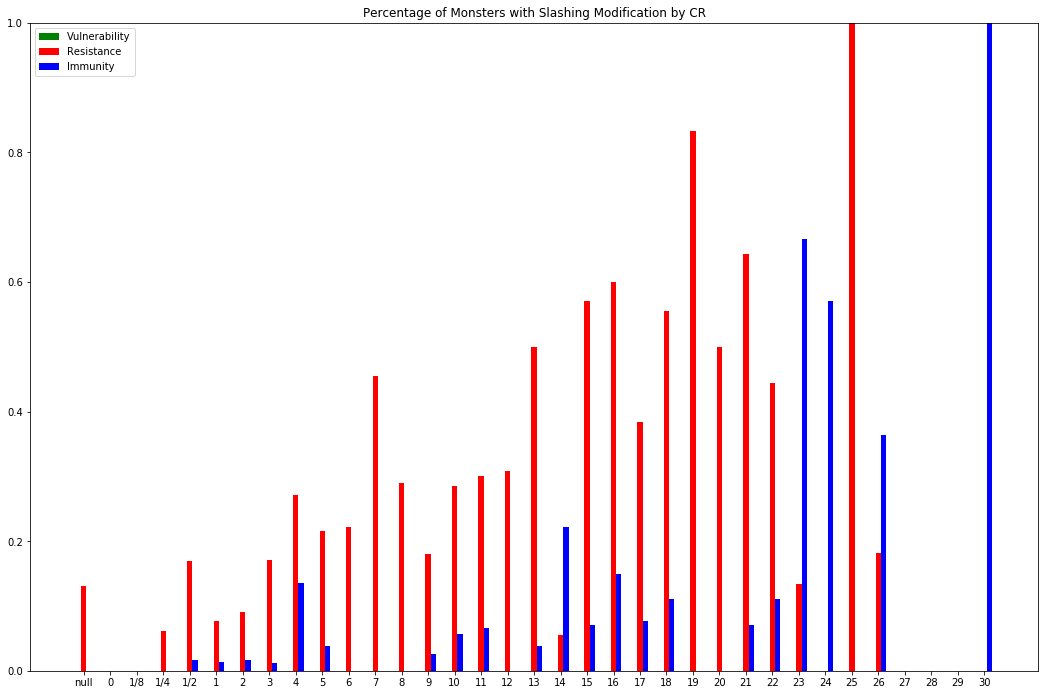

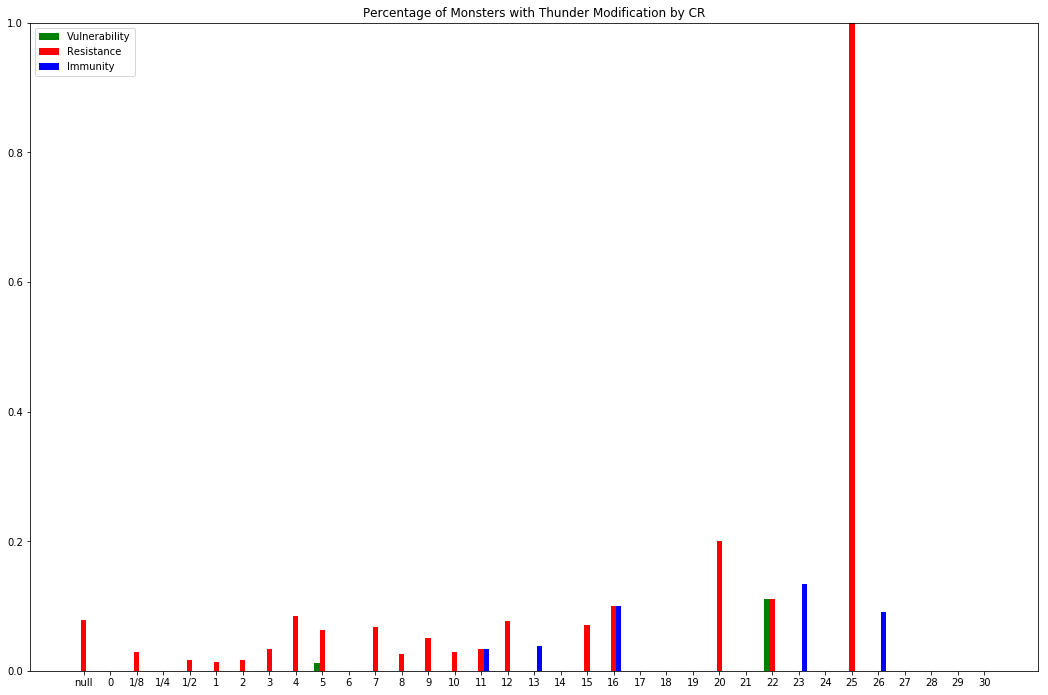

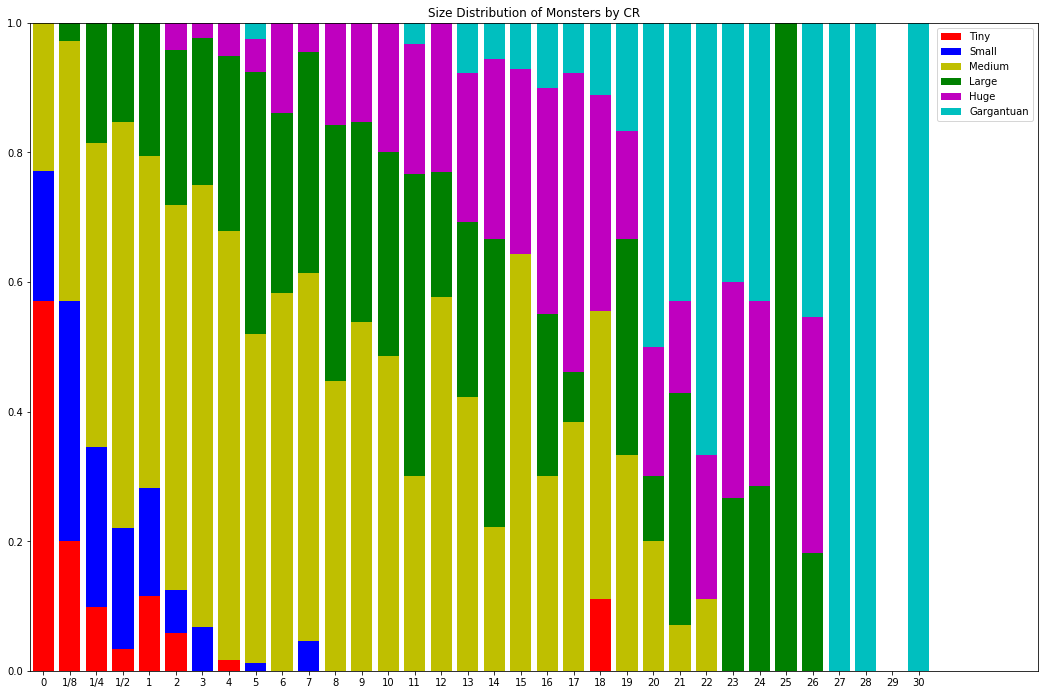

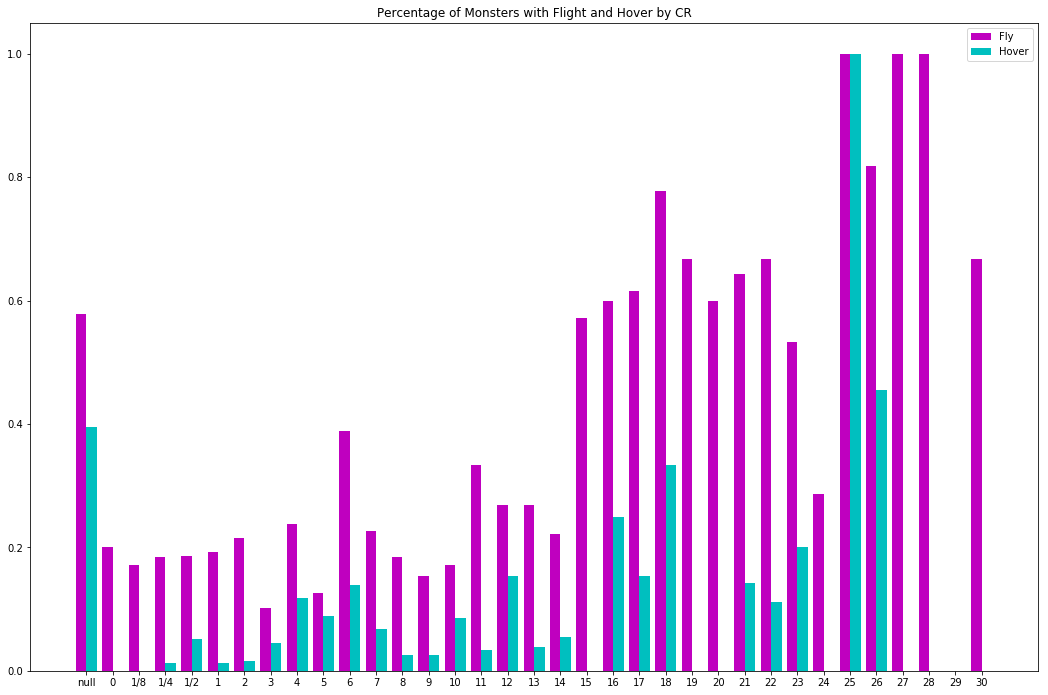

In [38]:
#print the graphs

import json
import matplotlib.pyplot as plt
import numpy as np
import operator

def removeAll(item, list0):
    if item in list0:
        list0.remove(item)
        removeAll(item, list0)
    else:
        return list0

def plotBoxplot(data, title):
    try:
        data[0] = removeAll("-", data[0])
        fig = plt.figure(figsize=(14,9))
        ax = fig.add_axes([0,0,1,1])
        bp = ax.boxplot(data)
        for median in bp["medians"]:
            median.set(color="red", lineWidth=3)
        ax.set_xticklabels(labels)
        plt.grid(axis="y")
        plt.title("Spread of Monster "+title+" by CR")
        plt.show()
    except:
        print(title)
        print(data)
        
def damagePlot(data, title):
    fig = plt.figure(figsize=(14,9))
    ax = fig.add_axes([0,0,1,1])
    x = np.arange(35)
    plt.bar(x-0.2, data[0], 0.2, color='g')
    plt.bar(x, data[1], 0.2, color='r')
    plt.bar(x+0.2, data[2], 0.2, color='b')
    plt.xticks(x, labels)
    plt.ylim(0,1)
    plt.title("Percentage of Monsters with "+title+" Modification by CR")
    plt.legend(["Vulnerability", "Resistance", "Immunity"], loc="upper left")
    plt.show()


damages = ["acid","bludgeoning","cold","fire","force","lightning","necrotic","piercing","poison","psychic","radiant",
           "slashing","thunder"]

labels = []
ACdata = []
HPdata = []
StrData = []
DexData = []
ConData = []
IntData = []
WisData = []
ChaData = []
tinyList = []
smallList = []
mediumList = []
largeList = []
hugeList = []
gargantuanList = []
flyData = []
hoverData = []
damageData={
    "acid":[[],[],[]], "bludgeoning":[[],[],[]], "cold":[[],[],[]],"fire":[[],[],[]],"force":[[],[],[]],
    "lightning":[[],[],[]],"necrotic":[[],[],[]],"piercing":[[],[],[]],"poison":[[],[],[]],"psychic":[[],[],[]],
    "radiant":[[],[],[]],"slashing":[[],[],[]],"thunder":[[],[],[]]
}


try:
    for cr in dataList:
        labels.append(cr)
        ACdata.append(dataList[cr]["AC"])
        HPdata.append(dataList[cr]["HP"])
        StrData.append(dataList[cr]["str"])
        DexData.append(dataList[cr]["dex"])
        ConData.append(dataList[cr]["con"])
        IntData.append(dataList[cr]["int"])
        WisData.append(dataList[cr]["wis"])
        ChaData.append(dataList[cr]["cha"])
        if dataList[cr]["total"] > 0:
            tinyList.append(dataList[cr]["T"]/dataList[cr]["total"])
            smallList.append(dataList[cr]["S"]/dataList[cr]["total"])
            mediumList.append(dataList[cr]["M"]/dataList[cr]["total"])
            largeList.append(dataList[cr]["L"]/dataList[cr]["total"])
            hugeList.append(dataList[cr]["H"]/dataList[cr]["total"])
            gargantuanList.append(dataList[cr]["G"]/dataList[cr]["total"])
            flyData.append(dataList[cr]["fly"]/dataList[cr]["total"])
            hoverData.append(dataList[cr]["hover"]/dataList[cr]["total"])
            for dmgType in damages:
                damageData[dmgType][0].append(dataList[cr]["vulnerabilities"][dmgType]/dataList[cr]["total"])
                damageData[dmgType][1].append(dataList[cr]["resistances"][dmgType]/dataList[cr]["total"])
                damageData[dmgType][2].append(dataList[cr]["immunities"][dmgType]/dataList[cr]["total"])
        else:
            tinyList.append(0)
            smallList.append(0)
            mediumList.append(0)
            largeList.append(0)
            hugeList.append(0)
            gargantuanList.append(0)
            flyData.append(0)
            hoverData.append(0)
            for dmgType in damages:
                damageData[dmgType][0].append(0)
                damageData[dmgType][1].append(0)
                damageData[dmgType][2].append(0)
except:
    print(cr)
    

#boxplot 1: AC
plotBoxplot(ACdata, "AC")
#boxplot 2: HP
plotBoxplot(HPdata, "Average HP")

#boxplot 3: stats
averages = [[],[],[],[],[],[]]
statData = [StrData, DexData, ConData, IntData, WisData, ChaData]
for num in range(6):
    removeAll("-", statData[num][0])
    for batch in statData[num]:
        if len(batch) >0:
            averages[num].append(np.mean(batch))
        else:
            averages[num].append(averages[num][len(averages[num])-1])


figAvg = plt.figure(figsize=(14,9))
ax = figAvg.add_axes([0,0,1,1])
bp = ax.plot(labels, averages[0])
bp = ax.plot(labels, averages[1])
bp = ax.plot(labels, averages[2])
bp = ax.plot(labels, averages[3])
bp = ax.plot(labels, averages[4], color='purple')
bp = ax.plot(labels, averages[5], color='magenta')
ax.legend(["Str", "Dex", "Con", "Int", "Wis", "Cha"])
plt.grid(axis="x")
plt.title("Average Saving Throw Modifiers by CR")
plt.show()

plotBoxplot(StrData, "Strength Save")
plotBoxplot(DexData, "Dexterity Save")
plotBoxplot(ConData, "Constitution Save")
plotBoxplot(IntData, "Intelligence Save")
plotBoxplot(WisData, "Wisdom Save")
plotBoxplot(ChaData, "Charisma Save")

#bar graph 1: dmg resistances, dmg immunities, dmg vulnerabilities
for dmgType in damages:
    damagePlot(damageData[dmgType], dmgType.capitalize())

#bar graph 2: sizes
figSize = plt.figure(figsize=(14,9))
ax = figSize.add_axes([0,0,1,1])
plt.bar(labels, tinyList, color='r')
plt.bar(labels, smallList, bottom=tinyList, color='b')
plt.bar(labels, mediumList,  bottom=[sum(item) for item in zip(tinyList, smallList)], color='y')
plt.bar(labels, largeList, bottom=[sum(item) for item in zip(tinyList, smallList, mediumList)], color='g')
plt.bar(labels, hugeList,  bottom=[sum(item) for item in zip(tinyList, smallList, mediumList, largeList)], color='m')
plt.bar(labels, gargantuanList, bottom=[sum(item) for item in zip(tinyList, smallList, mediumList, largeList, hugeList)],
        color='c')
plt.title("Size Distribution of Monsters by CR")
plt.legend(["Tiny","Small","Medium","Large","Huge","Gargantuan"])
plt.xlim(0.5, 38.5)
plt.show()

#bar graph 3: fly, hover
figFly = plt.figure(figsize=(14,9))
ax = figFly.add_axes([0,0,1,1])
x = np.arange(35)
plt.bar(x-0.2, flyData, 0.4, color='m')
plt.bar(x+0.2, hoverData, 0.4, color='c')
plt.xticks(x, labels)
plt.title("Percentage of Monsters with Flight and Hover by CR")
plt.legend(["Fly", "Hover"])
plt.show()

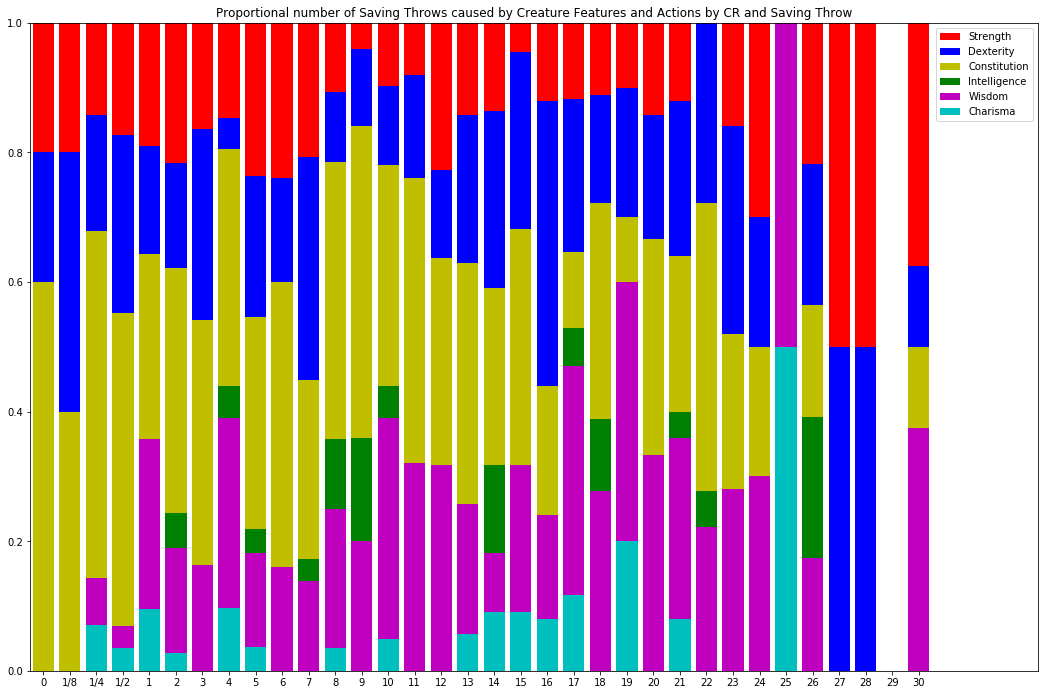

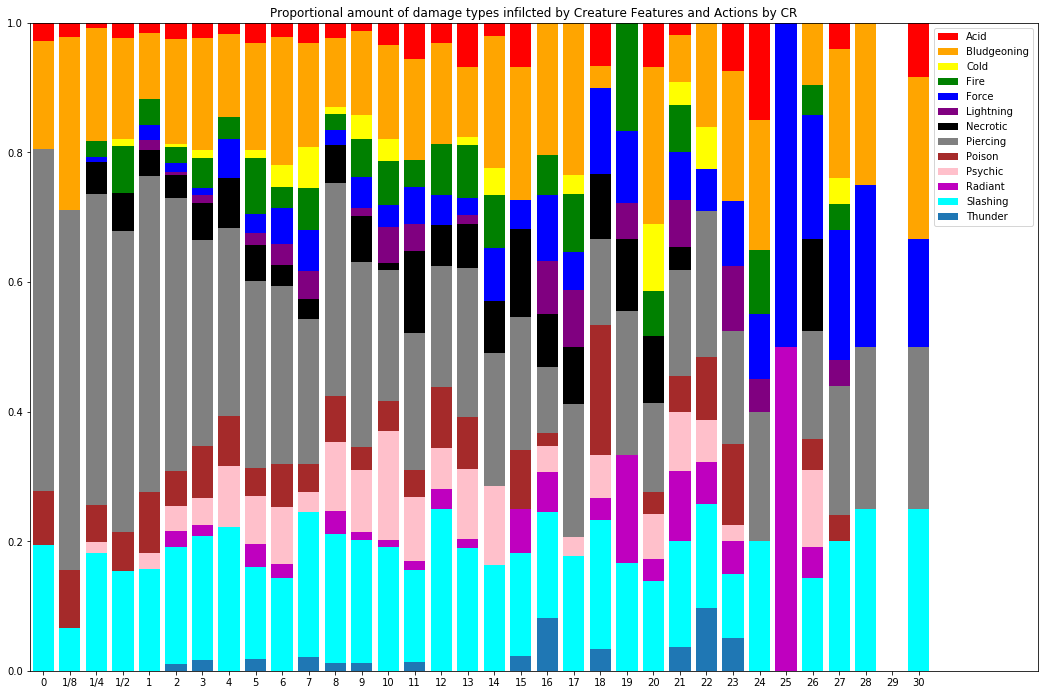

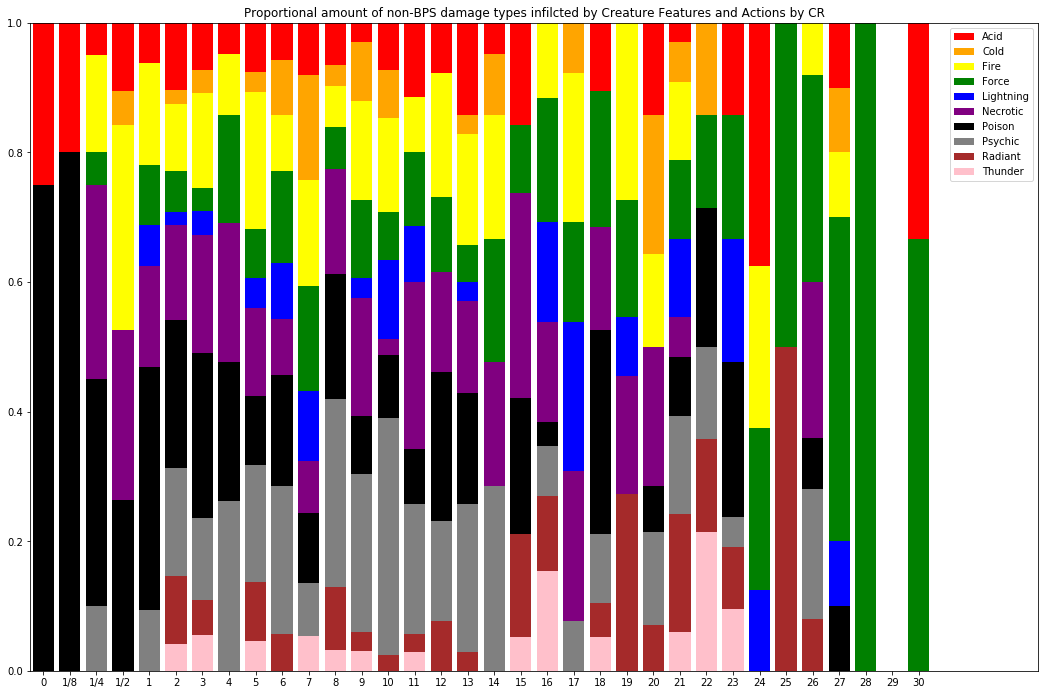

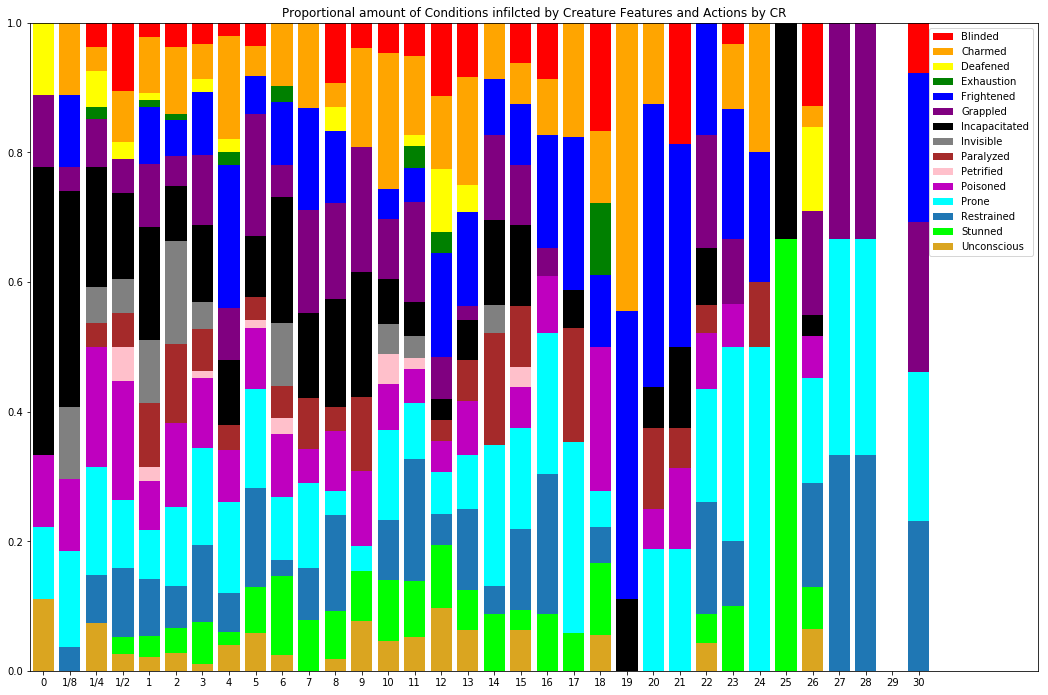

In [40]:
import math
import json
import matplotlib.pyplot as plt
import numpy as np
import operator

#damage graphs
#DONE damage dealt and saves inflicted?
#DCs and to hits?
#DONE conditions? {@condition _}
#spellcasting, DONE traits, action, bonus
    #not sure how to do spellcasting short of fucking doing another goddamn list for reference

#gotta count copies some how, can get the name of the original?

#saves called for
saves = [[],[],[],[],[],[]]
stats = ["strength", "dexterity", "constitution", "intelligence", "wisdom", "charisma"]

damages = ["acid", "bludgeoning", "cold","fire","force","lightning","necrotic", "piercing","poison","psychic","radiant",
           "slashing","thunder"]
damagesInflicted = {"acid":[], "bludgeoning":[], "cold":[],"fire":[],"force":[],"lightning":[],"necrotic":[],
                    "piercing":[],"poison":[],"psychic":[],"radiant":[],"slashing":[],"thunder":[]}
nonBPSdamagesInflicted = {"acid":[], "bludgeoning":[], "cold":[],"fire":[],"force":[],"lightning":[],"necrotic":[],
                    "piercing":[],"poison":[],"psychic":[],"radiant":[],"slashing":[],"thunder":[]}

conditions = ["blinded", "charmed", "deafened", "exhaustion", "frightened", "grappled", "incapacitated", "invisible", 
              "paralyzed", "petrified", "poisoned", "prone", "restrained", "stunned", "unconscious"]
conditionsInflicted = {"blinded":[], "charmed":[], "deafened":[], "exhaustion":[], "frightened":[], "grappled":[], 
                       "incapacitated":[], "invisible":[], "paralyzed":[], "petrified":[], "poisoned":[], "prone":[], 
                       "restrained":[], "stunned":[], "unconscious":[]}

labels = []
totals = []

#ablStat
#for creature in cr
    #ablBoolean
    #for item in action (then bonus)
        #ablBoolean = ablBoolean or item.entries contains "Ability saving throw"
    #ablStat += ablBoolean
#ablSaves.update({cr : ablStat})

for CR in crList:
    labels.append(CR)
    totals.append(len(crList[CR]))
    saveCounts = [0,0,0,0,0,0]
    damageCounts = {"acid":0, "bludgeoning":0, "cold":0,"fire":0,"force":0,"lightning":0,"necrotic":0,
                                "piercing":0,"poison":0,"psychic":0,"radiant":0,"slashing":0,"thunder":0}
    conditionCounts = {"blinded":0, "charmed":0, "deafened":0, "exhaustion":0, "frightened":0, "grappled":0, 
                       "incapacitated":0, "invisible":0, "paralyzed":0, "petrified":0, "poisoned":0, "prone":0, 
                       "restrained":0, "stunned":0, "unconscious":0}
    
    for creature in crList[CR]:
        booleans = [False, False, False, False, False, False]
        damageBooleans = {"acid":False,"bludgeoning":False,"cold":False,"fire":False,"force":False,
                          "lightning":False,"necrotic":False,"piercing":False,"poison":False,"psychic":False,
                          "radiant":False,"slashing":False,"thunder":False}
        conditionBooleans = {"blinded":False, "charmed":False, "deafened":False, "exhaustion":False, "frightened":False, 
                             "grappled":False, "incapacitated":False, "invisible":False, "paralyzed":False, 
                             "petrified":False, "poisoned":False, "prone":False, "restrained":False, "stunned":False, 
                             "unconscious":False}
        try:
            searchList = []
            if not(creature.get("trait") is None):
                searchList+=creature["trait"]
            if not(creature.get("action") is None):
                searchList+=creature["action"]
            if not(creature.get("bonus") is None):
                searchList+=creature["bonus"]
            if not(creature.get("legendary") is None):
                searchList+=creature["legendary"]

            #search list
            for feature in searchList:
                for entry in feature["entries"]:
                    if isinstance(entry, dict):
                        for subEntry in entry:
                            #saves
                            for index in range(6):
                                booleans[index] = booleans[index] or subEntry.lower().find(stats[index]+" saving throw")>=0
                            #damages
                            for damage in damages:
                                damageBooleans[damage] = damageBooleans[damage] or subEntry.lower().find(damage+" damage")>=0
                            #conditions
                            for condition in conditions:
                                conditionBooleans[condition] = (conditionBooleans[condition] or 
                                                                subEntry.lower().find("{@condition "+condition+"}")>=0)
                    else:
                        #saves
                        for index in range(6):
                                booleans[index] = booleans[index] or entry.lower().find(stats[index]+" saving throw")>=0
                        #damages
                        for damage in damages:
                                damageBooleans[damage] = damageBooleans[damage] or entry.lower().find(damage+" damage")>=0
                        #conditions
                        for condition in conditions:
                            conditionBooleans[condition] = (conditionBooleans[condition] or 
                                                            entry.lower().find("{@condition "+condition+"}")>=0)
            #save to overall list
            for index in range(6):
                if booleans[index]:
                    saveCounts[index] += 1
            for damage in damages:
                if damageBooleans[damage]:
                    damageCounts[damage] += 1
            for condition in conditions:
                if conditionBooleans[condition]:
                    conditionCounts[condition] += 1
        except KeyError:
            print(creature["name"]+" has no actions")
    
    #saves
    saveSum = saveCounts[0]+saveCounts[1]+saveCounts[2]+saveCounts[3]+saveCounts[4]+saveCounts[5]
    if(saveSum>0):
        for index in range(6):
            saves[index].append(saveCounts[index]/saveSum)
    else:
        for index in range(6):
            saves[index].append(0)
    #damages
    damageSum = 0
    for damage in damages:
        damageSum += damageCounts[damage]
    for damage in damages:
        if damageSum>0:
            damagesInflicted[damage].append(damageCounts[damage]/damageSum)
        else:
            damagesInflicted[damage].append(0)
    nonBPSdamageSum = 0
    for damage in nonBPSdamages:
        nonBPSdamageSum += damageCounts[damage]
    for damage in damages:
        if nonBPSdamageSum>0:
            nonBPSdamagesInflicted[damage].append(damageCounts[damage]/nonBPSdamageSum)
        else:
            nonBPSdamagesInflicted[damage].append(0)
    #conditions
    conditionSum = 0
    for condition in conditions:
        conditionSum += conditionCounts[condition]
    for condition in conditions:
        if conditionSum>0:
            conditionsInflicted[condition].append(conditionCounts[condition]/conditionSum)
        else:
            conditionsInflicted[condition].append(0)
    
    
#graphs
colors=["r", "orange", "yellow", "g", "b", "purple", "k", "grey", "brown", "pink", "m", "cyan", "tab:blue", "lime", 
        "goldenrod"]
figSaves = plt.figure(figsize=(14,9))
ax = figSaves.add_axes([0,0,1,1])
plt.bar(labels, saves[0], bottom=[sum(item) for item in zip(saves[5], saves[4], saves[3], saves[2], saves[1])], color='r')
plt.bar(labels, saves[1], bottom=[sum(item) for item in zip(saves[5], saves[4], saves[3], saves[2])], color='b')
plt.bar(labels, saves[2], bottom=[sum(item) for item in zip(saves[5], saves[4], saves[3])], color='y')
plt.bar(labels, saves[3], bottom=[sum(item) for item in zip(saves[5], saves[4])], color='g')
plt.bar(labels, saves[4], bottom=saves[5], color='m')
plt.bar(labels, saves[5], color='c')
ax.legend([item.capitalize() for item in stats], loc="upper right")
plt.title("Proportional number of Saving Throws caused by Creature Features and Actions by CR and Saving Throw")
plt.xlim(0.5, 38.5)
plt.show()

#print("Damages inflicted: "+str(damagesInflicted))
figDamages = plt.figure(figsize=(14, 9))
ax = figDamages.add_axes([0,0,1,1])
for index in range(len(damages)):
    if index+1<len(damages):
        plt.bar(labels, damagesInflicted[damages[index]], 
                bottom=[sum(item) for item in zip(*[damagesInflicted[x] for x in damages[index+1:]])], 
                color=colors[index])
    else:
        plt.bar(labels, damagesInflicted[damages[index]], color=colors[index])
ax.legend([item.capitalize() for item in damages], loc="upper right")
plt.title("Proportional amount of damage types infilcted by Creature Features and Actions by CR")
plt.xlim(0.5, 38.5)
plt.show()

nonBPSdamages = ["acid", "cold","fire","force","lightning","necrotic","poison","psychic","radiant","thunder"]
figNonBPSdamages = plt.figure(figsize=(14, 9))
ax = figNonBPSdamages.add_axes([0,0,1,1])
for index in range(len(nonBPSdamages)):
    if index+1<len(nonBPSdamages):
        plt.bar(labels, nonBPSdamagesInflicted[nonBPSdamages[index]], 
                bottom=[sum(item) for item in zip(*[nonBPSdamagesInflicted[x] for x in nonBPSdamages[index+1:]])], 
                color=colors[index])
    else:
        plt.bar(labels, nonBPSdamagesInflicted[nonBPSdamages[index]], color=colors[index])
ax.legend([item.capitalize() for item in nonBPSdamages], loc="upper right")
plt.title("Proportional amount of non-BPS damage types infilcted by Creature Features and Actions by CR")
plt.xlim(0.5, 38.5)
plt.show()

figConditions = plt.figure(figsize=(14, 9))
ax = figConditions.add_axes([0,0,1,1])
for index in range(len(conditions)):
    if index+1<len(conditions):
        plt.bar(labels, conditionsInflicted[conditions[index]], 
                bottom=[sum(item) for item in zip(*[conditionsInflicted[x] for x in conditions[index+1:]])], 
                color=colors[index])
    else:
        plt.bar(labels, conditionsInflicted[conditions[index]], color=colors[index])
ax.legend([item.capitalize() for item in conditions], loc="upper right")
plt.title("Proportional amount of Conditions infilcted by Creature Features and Actions by CR")
plt.xlim(0.5, 38.5)
plt.show()